In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch import optim
from torchsummary import summary

In [4]:
import utils
from model import Network
from utils import train_loader, test_loader, train, test

100%|██████████| 9912422/9912422 [00:00<00:00, 112528280.44it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40324798.21it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32118982.34it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19379988.57it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:
# Get data, label in batch
batch_data, batch_label = next(iter(train_loader))

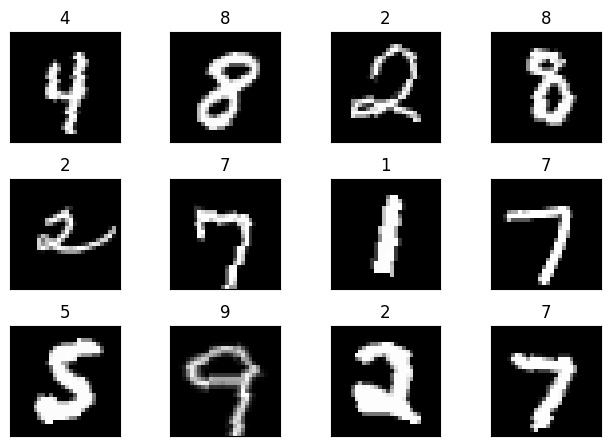

In [6]:
# Visualize few input images and its labels
fig = plt.figure()
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

In [7]:
# Model Summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Network().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
# Define optimizer, scheduler and criterion
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = F.nll_loss

Adjusting learning rate of group 0 to 1.0000e-02.


In [10]:
 # Train and test the model in epoch
num_epochs = 20
for epoch in range(1, num_epochs + 1):
   print(f'Epoch {epoch}')
   train(model, device, train_loader, optimizer, criterion)
   test(model, device, test_loader, criterion)
   scheduler.step()

Epoch 1


Train: Loss=-0.1032 Batch_id=117 Accuracy=21.69: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: -0.1036, Accuracy: 2199/10000 (21.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=-0.3138 Batch_id=117 Accuracy=25.47: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]


Test set: Average loss: -0.2789, Accuracy: 2951/10000 (29.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=-0.5430 Batch_id=117 Accuracy=41.25: 100%|██████████| 118/118 [00:20<00:00,  5.87it/s]


Test set: Average loss: -0.5311, Accuracy: 5367/10000 (53.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=-0.5719 Batch_id=117 Accuracy=53.20: 100%|██████████| 118/118 [00:21<00:00,  5.54it/s]


Test set: Average loss: -0.5580, Accuracy: 5611/10000 (56.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=-0.5076 Batch_id=117 Accuracy=54.81: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]


Test set: Average loss: -0.5707, Accuracy: 5735/10000 (57.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=-0.5050 Batch_id=117 Accuracy=55.84: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]


Test set: Average loss: -0.5716, Accuracy: 5729/10000 (57.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=-0.5521 Batch_id=117 Accuracy=56.62: 100%|██████████| 118/118 [00:21<00:00,  5.60it/s]


Test set: Average loss: -0.5806, Accuracy: 5826/10000 (58.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=-0.5258 Batch_id=117 Accuracy=57.31: 100%|██████████| 118/118 [00:20<00:00,  5.83it/s]


Test set: Average loss: -0.5848, Accuracy: 5869/10000 (58.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=-0.6459 Batch_id=117 Accuracy=57.81: 100%|██████████| 118/118 [00:20<00:00,  5.76it/s]


Test set: Average loss: -0.5885, Accuracy: 5894/10000 (58.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=-0.7782 Batch_id=117 Accuracy=63.63: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: -0.7665, Accuracy: 7696/10000 (76.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=-0.6944 Batch_id=117 Accuracy=76.37: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: -0.7773, Accuracy: 7789/10000 (77.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=-0.7794 Batch_id=117 Accuracy=76.92: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: -0.7782, Accuracy: 7797/10000 (77.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=-0.7790 Batch_id=117 Accuracy=77.12: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: -0.7829, Accuracy: 7837/10000 (78.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=-0.8256 Batch_id=117 Accuracy=77.41: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


Test set: Average loss: -0.7841, Accuracy: 7847/10000 (78.47%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=-0.7123 Batch_id=117 Accuracy=77.78: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: -0.7849, Accuracy: 7858/10000 (78.58%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=-0.7811 Batch_id=117 Accuracy=77.87: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: -0.7851, Accuracy: 7857/10000 (78.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=-0.7791 Batch_id=117 Accuracy=77.89: 100%|██████████| 118/118 [00:21<00:00,  5.38it/s]


Test set: Average loss: -0.7854, Accuracy: 7868/10000 (78.68%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=-0.8010 Batch_id=117 Accuracy=77.87: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: -0.7857, Accuracy: 7872/10000 (78.72%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=-0.7748 Batch_id=117 Accuracy=77.95: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: -0.7856, Accuracy: 7863/10000 (78.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=-0.8735 Batch_id=117 Accuracy=77.95: 100%|██████████| 118/118 [00:21<00:00,  5.44it/s]


Test set: Average loss: -0.7863, Accuracy: 7873/10000 (78.73%)

Adjusting learning rate of group 0 to 1.0000e-03.
